Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import recall_score, f1_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection & Processing

In [ ]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [ ]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking for missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


Data Analysis

In [ ]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

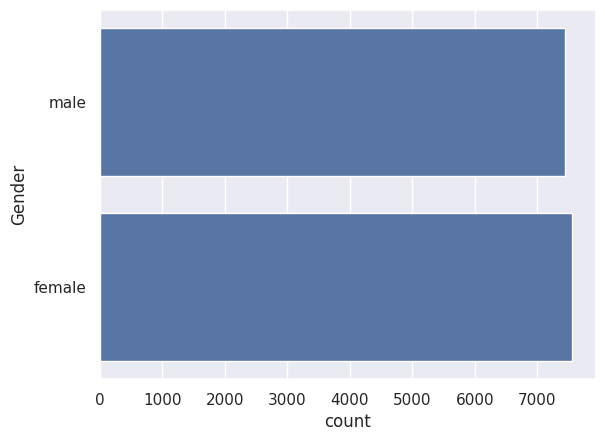

In [ ]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

<ipython-input-15-6cbf196d4d06>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

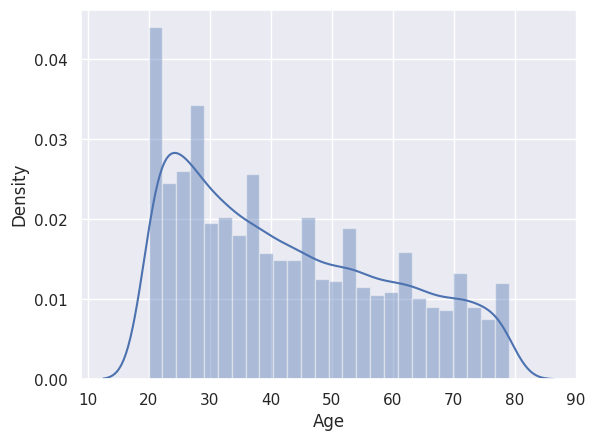

In [ ]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

<ipython-input-16-fdc2a1fecb6d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

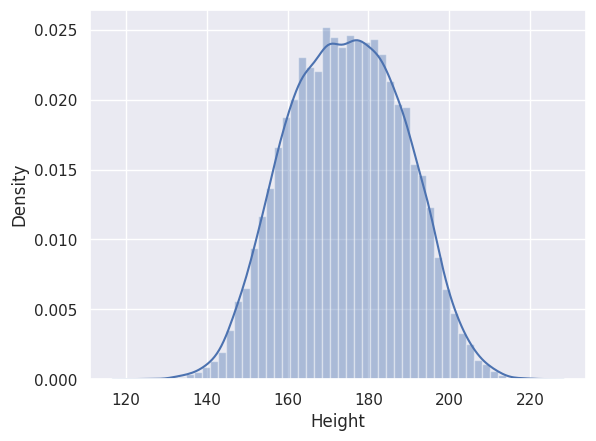

In [ ]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

<ipython-input-17-ac6457c483b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

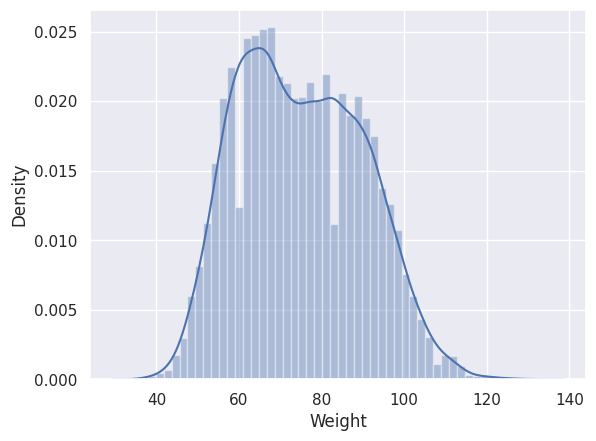

In [ ]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = calories_data.select_dtypes(include=[float, int]).corr()

<Axes: >

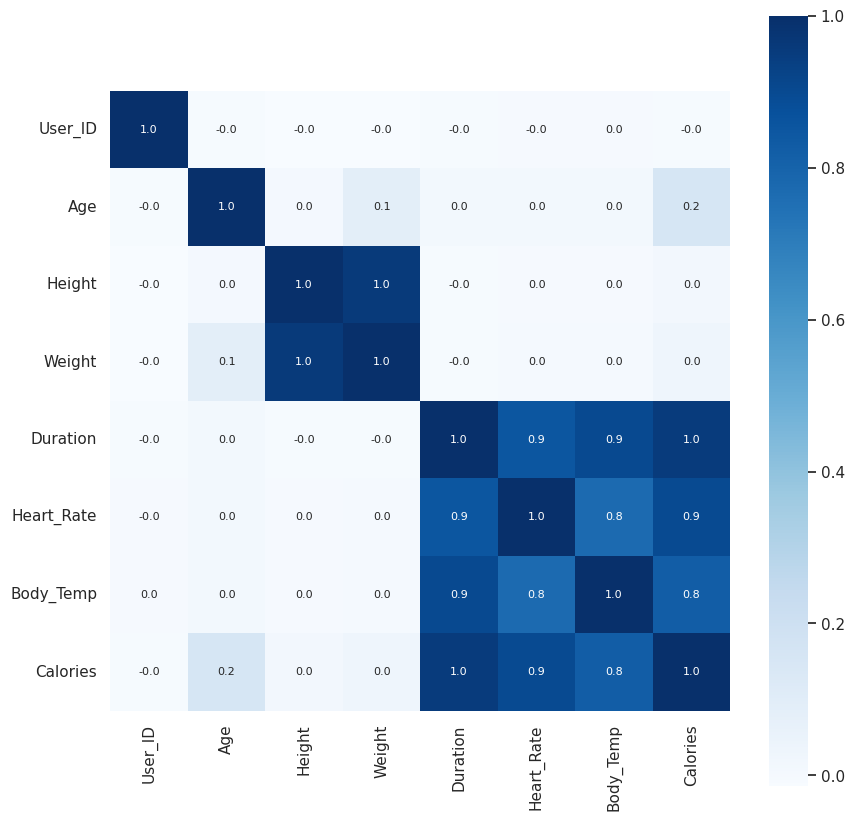

In [ ]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Converting the text data to numerical values

In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

<ipython-input-20-58112ca46fc1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [ ]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on Test Data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


XGBoost Regression

XGBoost - Recall: 0.9681528662420382
XGBoost - F1-score: 0.9620253164556962
XGBoost - R-squared:  0.998800624504713
XGBoost - MAE: 1.4833678883314132, MSE: 4.710710012461346, RMSE: 2.1704170134933394, Accuracy: 99.99944661189309%


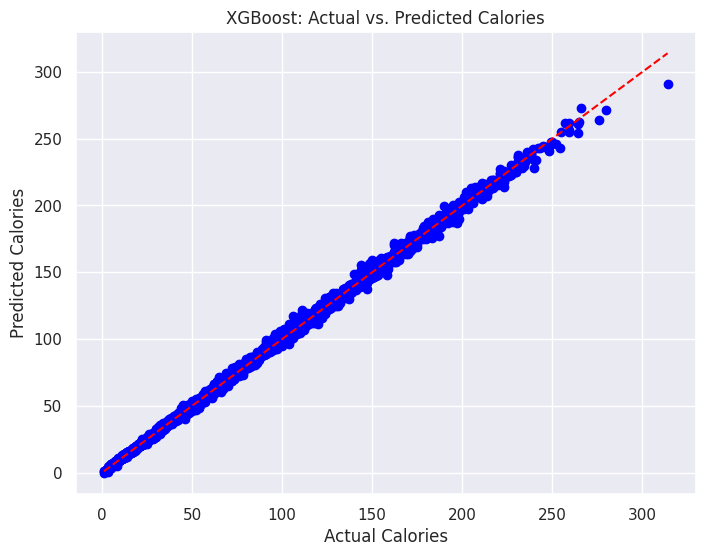

In [ ]:
# Train the XGBoost Regressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train, Y_train)

# Predict on the test data using XGBoost
test_data_prediction_xgb = model_xgb.predict(X_test)

# Performance metrics for XGBoost
r2_error_xgb = metrics.r2_score(Y_test, test_data_prediction_xgb)
mae_xgb = metrics.mean_absolute_error(Y_test, test_data_prediction_xgb)
mse_xgb = metrics.mean_squared_error(Y_test, test_data_prediction_xgb)
rmse_xgb = np.sqrt(mse_xgb)
accuracy_xgb = 100 - (mae_xgb * 100 / sum(Y_test))

threshold = 200  # You can adjust this value depending on the context
predicted_classes = (test_data_prediction > threshold).astype(int)

# Convert the true target values to binary
true_classes = (Y_test > threshold).astype(int)

# Calculate recall
recall = recall_score(true_classes, predicted_classes)
print(f"XGBoost - Recall: {recall}")

# Calculate F1-score
f1 = f1_score(true_classes, predicted_classes)
print(f"XGBoost - F1-score: {f1}")

print("XGBoost - R-squared: ", r2_error_xgb)
print(f"XGBoost - MAE: {mae_xgb}, MSE: {mse_xgb}, RMSE: {rmse_xgb}, Accuracy: {accuracy_xgb}%")

# Plotting actual vs predicted values for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, test_data_prediction_xgb, color='blue')  # Scatter plot for XGBoost predictions
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("XGBoost: Actual vs. Predicted Calories")
plt.show()

Linear Regression

Linear Regression - Recall: 0.9681528662420382
Linear Regression - F1-score: 0.9620253164556962
Linear Regression - R squared error:  0.9668790377181355
Linear Regression - MAE: 8.385188053147187, MSE: 130.08707386188374, RMSE: 11.405572053250276, Accuracy: 99.99687180545075%


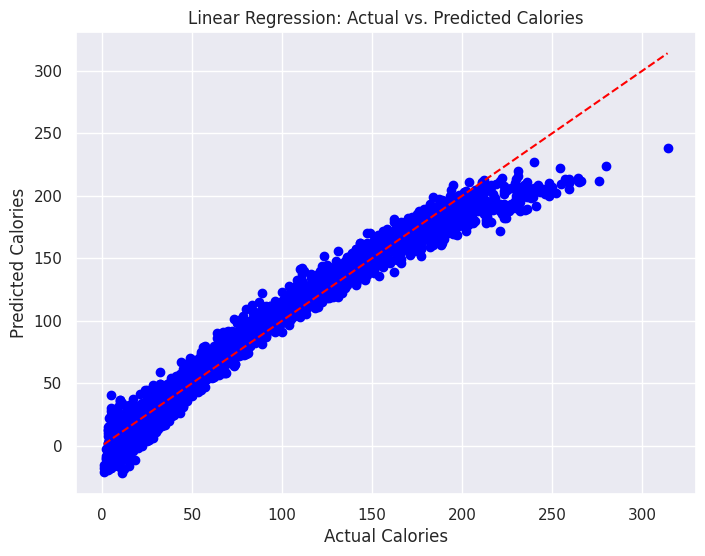

In [ ]:
# Train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

# Predict on the test data
test_data_prediction_lr = model_lr.predict(X_test)

# Calculate R-squared error for Linear Regression
r2_error_lr = metrics.r2_score(Y_test, test_data_prediction_lr)

# Additional performance metrics for Linear Regression
mae_lr = metrics.mean_absolute_error(Y_test, test_data_prediction_lr)
mse_lr = metrics.mean_squared_error(Y_test, test_data_prediction_lr)
rmse_lr = np.sqrt(mse_lr)

# Calculate accuracy for Linear Regression
accuracy_lr = 100 - (mae_lr * 100 / sum(Y_test))

threshold = 200  # You can adjust this value depending on the context
predicted_classes = (test_data_prediction > threshold).astype(int)

# Convert the true target values to binary
true_classes = (Y_test > threshold).astype(int)

# Calculate recall
recall = recall_score(true_classes, predicted_classes)
print(f"Linear Regression - Recall: {recall}")

# Calculate F1-score
f1 = f1_score(true_classes, predicted_classes)
print(f"Linear Regression - F1-score: {f1}")

print("Linear Regression - R squared error: ", r2_error_lr)
print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}, Accuracy: {accuracy_lr}%")

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))  # Adjust figure size
plt.scatter(Y_test, test_data_prediction_lr, color='blue')  # Scatter plot
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Linear Regression: Actual vs. Predicted Calories")
plt.show()

SVM Regression

SVM - Recall: 0.9681528662420382
SVM - F1-score: 0.9620253164556962
SVM - R-squared:  0.9380560925377789
SVM - MAE: 10.620614362927721, MSE: 243.29310231858554, RMSE: 15.597855696171367, Accuracy: 99.99603785296773%


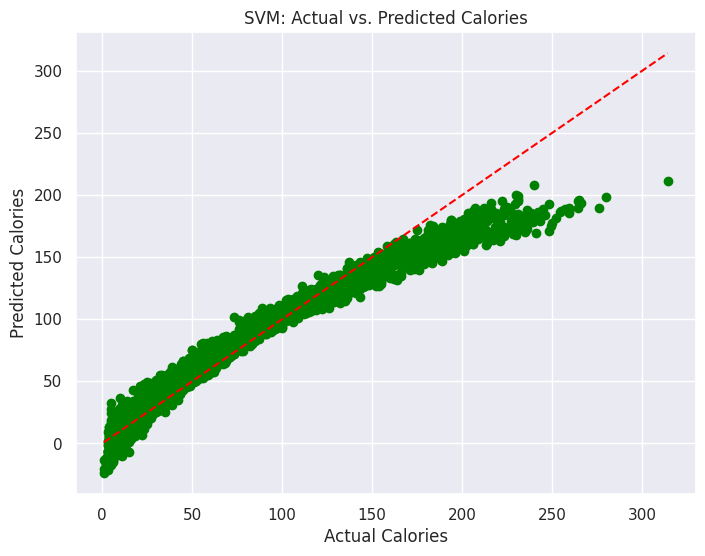

In [ ]:
# Train the SVM model (Support Vector Regression)
model_svm = SVR(kernel='rbf')  # You can experiment with different kernels like 'linear', 'poly', 'rbf'
model_svm.fit(X_train, Y_train)

# Predict on the test data using SVM
test_data_prediction_svm = model_svm.predict(X_test)

# Performance metrics for SVM
r2_error_svm = metrics.r2_score(Y_test, test_data_prediction_svm)
mae_svm = metrics.mean_absolute_error(Y_test, test_data_prediction_svm)
mse_svm = metrics.mean_squared_error(Y_test, test_data_prediction_svm)
rmse_svm = np.sqrt(mse_svm)
accuracy_svm = 100 - (mae_svm * 100 / sum(Y_test))

threshold = 200
predicted_classes = (test_data_prediction > threshold).astype(int)

# Convert the true target values to binary
true_classes = (Y_test > threshold).astype(int)

# Calculate recall
recall = recall_score(true_classes, predicted_classes)
print(f"SVM - Recall: {recall}")

# Calculate F1-score
f1 = f1_score(true_classes, predicted_classes)
print(f"SVM - F1-score: {f1}")

print("SVM - R-squared: ", r2_error_svm)
print(f"SVM - MAE: {mae_svm}, MSE: {mse_svm}, RMSE: {rmse_svm}, Accuracy: {accuracy_svm}%")

# Plotting actual vs predicted values for SVM
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, test_data_prediction_svm, color='green')  # Scatter plot for SVM predictions
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("SVM: Actual vs. Predicted Calories")
plt.show()

Random Forest Regression

Random Forest - Recall: 0.9681528662420382
Random Forest - F1-score: 0.9620253164556962
Random Forest - R-squared:  0.9982294181032488
Random Forest - MAE: 1.6851799999999997, MSE: 6.954200666666666, RMSE: 2.63708184678949, Accuracy: 99.99937132347455%


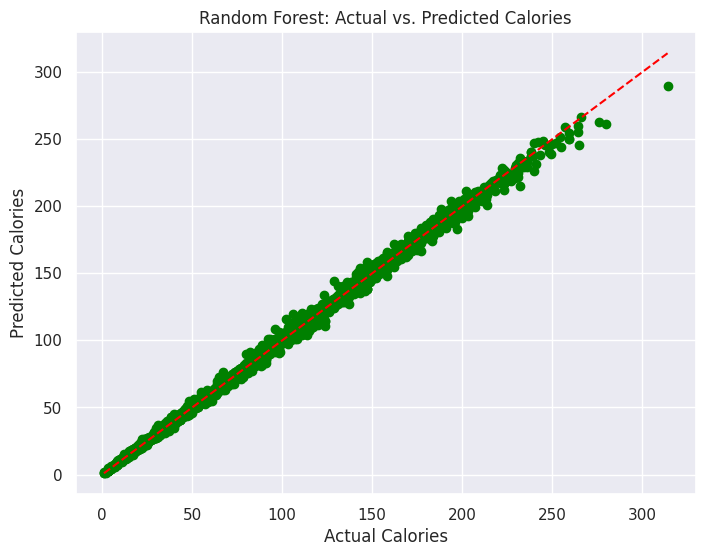

In [ ]:
# Train the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=2)
model_rf.fit(X_train, Y_train)

# Predict on the test data using Random Forest
test_data_prediction_rf = model_rf.predict(X_test)

# Calculate performance metrics for Random Forest
r2_error_rf = metrics.r2_score(Y_test, test_data_prediction_rf)
mae_rf = metrics.mean_absolute_error(Y_test, test_data_prediction_rf)
mse_rf = metrics.mean_squared_error(Y_test, test_data_prediction_rf)
rmse_rf = np.sqrt(mse_rf)

# Calculate accuracy for Random Forest
accuracy_rf = 100 - (mae_rf * 100 / sum(Y_test))

threshold = 200  # You can adjust this value depending on the context
predicted_classes = (test_data_prediction > threshold).astype(int)

# Convert the true target values to binary
true_classes = (Y_test > threshold).astype(int)

# Calculate recall
recall = recall_score(true_classes, predicted_classes)
print(f"Random Forest - Recall: {recall}")

# Calculate F1-score
f1 = f1_score(true_classes, predicted_classes)
print(f"Random Forest - F1-score: {f1}")

# Print the performance metrics
print("Random Forest - R-squared: ", r2_error_rf)
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, Accuracy: {accuracy_rf}%")

# Plotting actual vs predicted values for Random Forest
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
plt.scatter(Y_test, test_data_prediction_rf, color='green')  # Scatter plot for Random Forest predictions
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Random Forest: Actual vs. Predicted Calories")
plt.show()

Overall code

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import recall_score, f1_score

# Load datasets
calories = pd.read_csv('/content/calories.csv')
exercise_data = pd.read_csv('/content/exercise.csv')

# Merge datasets
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

# Preprocessing
calories_data.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)

# Split the data into features (X) and target (Y)
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calorie']
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Initialize Models
xgb_model = XGBRegressor()
rf_model = RandomForestRegressor()
lr_model = LinearRegression()
svr_model = SVR()

# Function to calculate accuracy
def calculate_accuracy(Y_test, predictions):
    mae = metrics.mean_absolute_error(Y_test, predictions)
    accuracy = 100 - (mae * 100 / sum(Y_test))
    return accuracy

# Function to calculate recall and F1-score for regression
def calculate_classification_metrics(Y_test, predictions, threshold):
    # Convert continuous predictions to binary classes based on threshold
    predicted_classes = (predictions > threshold).astype(int)
    actual_classes = (Y_test > threshold).astype(int)

    # Calculate recall and F1 score
    recall = recall_score(actual_classes, predicted_classes)
    f1 = f1_score(actual_classes, predicted_classes)

    return recall, f1

# Set a threshold for classification (you can adjust this based on your data)
threshold = 200

# Train and Evaluate XGBoost
xgb_model.fit(X_train, Y_train)
xgb_pred = xgb_model.predict(X_test)
mae_xgb = metrics.mean_absolute_error(Y_test, xgb_pred)
r2_xgb = metrics.r2_score(Y_test, xgb_pred)
accuracy_xgb = calculate_accuracy(Y_test, xgb_pred)
recall_xgb, f1_xgb = calculate_classification_metrics(Y_test, xgb_pred, threshold)
print(f"XGBoost - MAE: {mae_xgb}, R-squared: {r2_xgb}, Accuracy: {accuracy_xgb}%, Recall: {recall_xgb}, F1 Score: {f1_xgb}")

# Train and Evaluate Random Forest
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
mae_rf = metrics.mean_absolute_error(Y_test, rf_pred)
r2_rf = metrics.r2_score(Y_test, rf_pred)
accuracy_rf = calculate_accuracy(Y_test, rf_pred)
recall_rf, f1_rf = calculate_classification_metrics(Y_test, rf_pred, threshold)
print(f"Random Forest - MAE: {mae_rf}, R-squared: {r2_rf}, Accuracy: {accuracy_rf}%, Recall: {recall_rf}, F1 Score: {f1_rf}")

# Train and Evaluate Linear Regression
lr_model.fit(X_train, Y_train)
lr_pred = lr_model.predict(X_test)
mae_lr = metrics.mean_absolute_error(Y_test, lr_pred)
r2_lr = metrics.r2_score(Y_test, lr_pred)
accuracy_lr = calculate_accuracy(Y_test, lr_pred)
recall_lr, f1_lr = calculate_classification_metrics(Y_test, lr_pred, threshold)
print(f"Linear Regression - MAE: {mae_lr}, R-squared: {r2_lr}, Accuracy: {accuracy_lr}%, Recall: {recall_lr}, F1 Score: {f1_lr}")

# Train and Evaluate Support Vector Regressor
svr_model.fit(X_train, Y_train)
svr_pred = svr_model.predict(X_test)
mae_svr = metrics.mean_absolute_error(Y_test, svr_pred)
r2_svr = metrics.r2_score(Y_test, svr_pred)
accuracy_svr = calculate_accuracy(Y_test, svr_pred)
recall_svr, f1_svr = calculate_classification_metrics(Y_test, svr_pred, threshold)
print(f"SVM - MAE: {mae_svr}, R-squared: {r2_svr}, Accuracy: {accuracy_svr}%, Recall: {recall_svr}, F1 Score: {f1_svr}")

# Plot actual vs predicted for all models
plt.figure(figsize=(15, 10))

# XGBoost
plt.subplot(2, 2, 1)
plt.scatter(Y_test, xgb_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title("XGBoost: Actual vs. Predicted")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
9*--9**999666666
# Random Forest
plt.subplot(2, 2, 2)
plt.scatter(Y_test, rf_pred, color='green')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title("Random Forest: Actual vs. Predicted")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")

# Linear Regression
plt.subplot(2, 2, 3)
plt.scatter(Y_test, lr_pred, color='orange')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title("Linear Regression: Actual vs. Predicted")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")

# SVM
plt.subplot(2, 2, 4)
plt.scatter(Y_test, svr_pred, color='purple')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title("SVM: Actual vs. Predicted")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")

plt.tight_layout()
plt.show()

<ipython-input-36-cc1797f6e62c>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)


KeyError: 'Calorie'

In [ ]:
def predict_calories(input_data):
    # Convert input data into a numpy array and reshape
    input_data_as_numpy_array = np.array(input_data).reshape(1, -1)

    # Predict using XGBoost
    xgb_prediction = xgb_model.predict(input_data_as_numpy_array)
    print(f"Predicted Calories (XGBoost): {xgb_prediction[0]}")

    # Predict using Random Forest
    rf_prediction = rf_model.predict(input_data_as_numpy_array)
    print(f"Predicted Calories (Random Forest): {rf_prediction[0]}")

    # Predict using Linear Regression
    lr_prediction = lr_model.predict(input_data_as_numpy_array)
    print(f"Predicted Calories (Linear Regression): {lr_prediction[0]}")

    # Predict using SVM
    svr_prediction = svr_model.predict(input_data_as_numpy_array)
    print(f"Predicted Calories (SVM): {svr_prediction[0]}")

# Example User Input
# Gender: male (0), Age: 25, Height: 175, Weight: 70, Duration: 30, Heart_Rate: 120, Body_Temp: 36.5
input_data = [0, 25, 175, 70, 30, 120, 36.5]

# Call the predictive function
predict_calories(input_data)

# Train and Evaluate Models
xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
svr_pred = svr_model.predict(X_test)